<a href="https://colab.research.google.com/github/Dilanya/Chess-Pieces-Detection/blob/main/Chess_Pieces_yolov8_object_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Before you start

Let's make sure that we have access to GPU. We can use `nvidia-smi` command to do that. In case of any problems navigate to `Edit` -> `Notebook settings` -> `Hardware accelerator`, set it to `GPU`, and then click `Save`.

In [ ]:
!nvidia-smi

Thu Mar  9 16:48:23 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   67C    P0    31W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
# Pip install method (recommended)

!pip install ultralytics==8.0.20

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 25.4/78.2 GB disk)


#Install YOLO

In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

#Dataset

In [ ]:
!mkdir {HOME}/datasets
%cd {HOME}/datasets

!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="API KEY")
project = rf.workspace("models-mc3oh").project("chess-pieces-detection-v4fl1")
dataset = project.version(1).download("yolov8")

#Training

In [ ]:
%cd {HOME}

!yolo task=detect mode=train model=yolov8s.pt data={dataset.location}/data.yaml epochs=25 imgsz=800 plots=True

/content
100% 21.5M/21.5M [00:00<00:00, 226MB/s]

Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.yaml, data=/content/datasets/Chess-Pieces-Detection-1/data.yaml, epochs=25, patience=50, batch=16, imgsz=800, save=True, cache=False, device=, workers=8, project=None, name=None, exist_ok=False, pretrained=False, optimizer=SGD, verbose=True, seed=0, deterministic=True, single_cls=False, image_weights=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, overlap_mask=True, mask_ratio=4, dropout=False, val=True, save_json=False, save_hybrid=False, conf=0.001, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=ultralytics/assets/, show=False, save_txt=False, save_conf=False, save_crop=False, hide_labels=False, hide_conf=False, vid_stride=1, line_thickness=3, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript

In [ ]:
!ls {HOME}/runs/detect/train/

args.yaml					   train_batch0.jpg
confusion_matrix.png				   train_batch105.jpg
events.out.tfevents.1678380605.e6ef38e45f11.967.0  train_batch106.jpg
F1_curve.png					   train_batch107.jpg
P_curve.png					   train_batch1.jpg
PR_curve.png					   train_batch2.jpg
R_curve.png					   val_batch0_labels.jpg
results.csv					   val_batch0_pred.jpg
results.png					   weights


/content


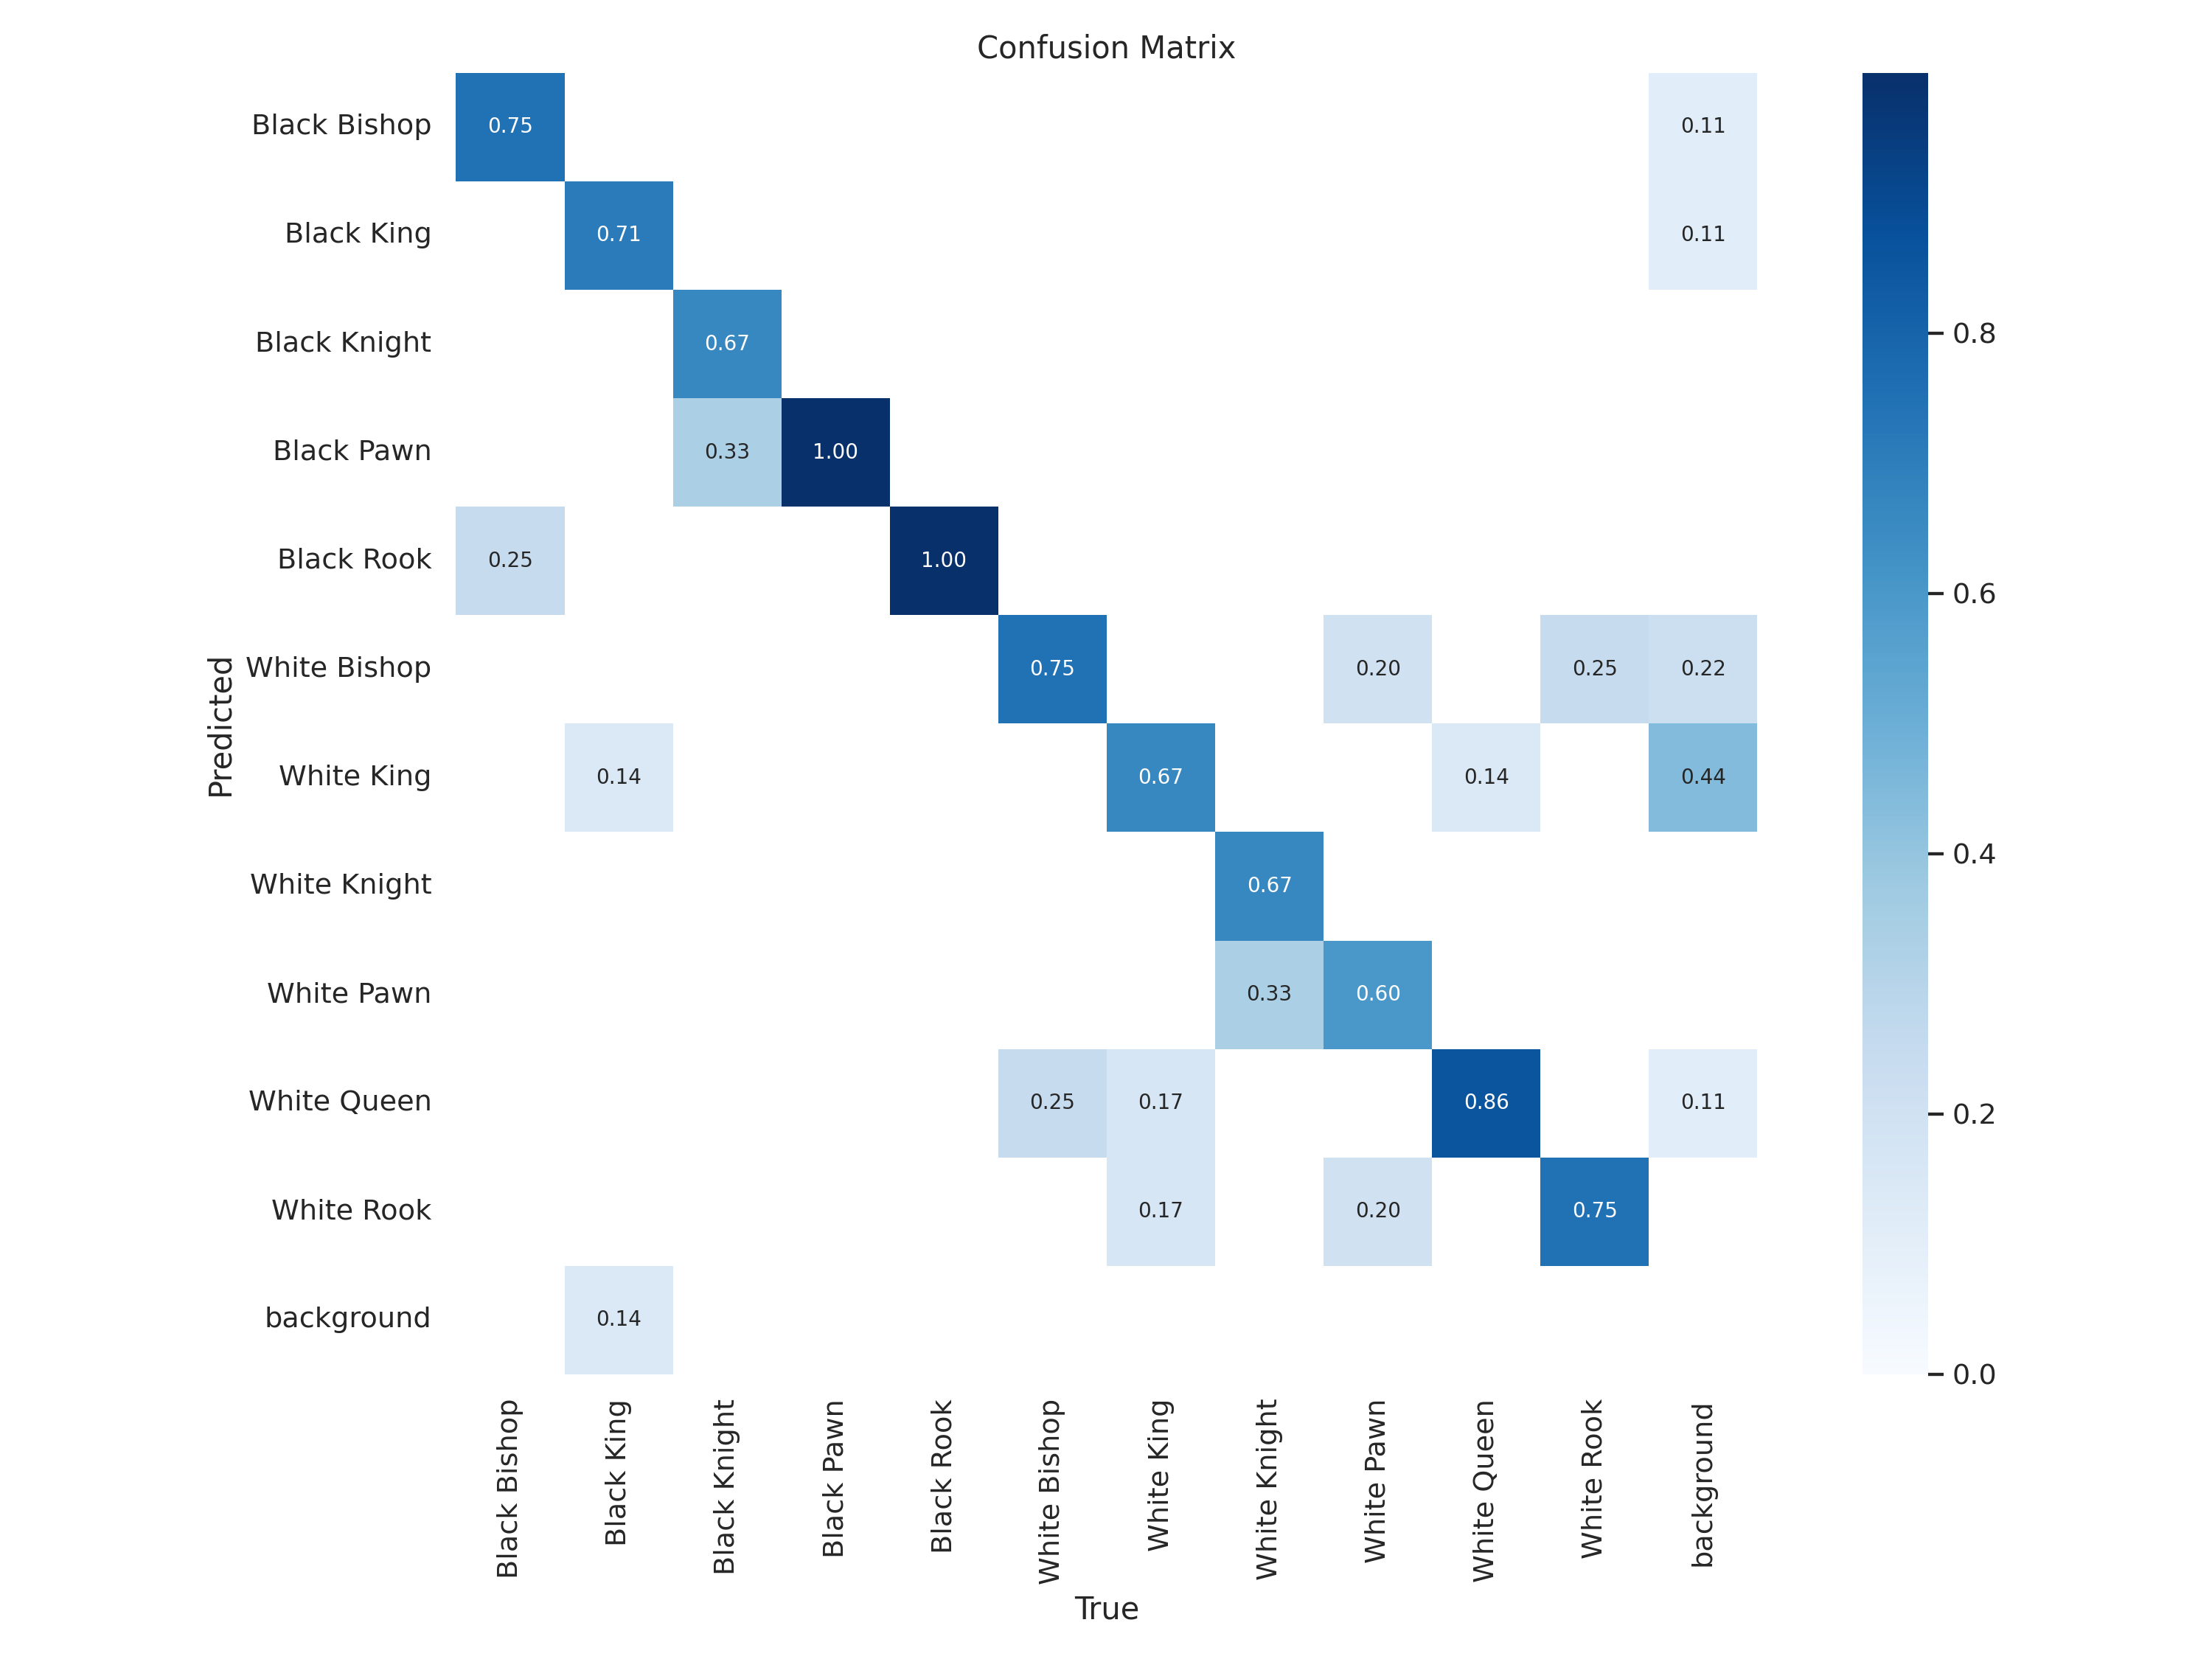

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/confusion_matrix.png', width=600)

/content


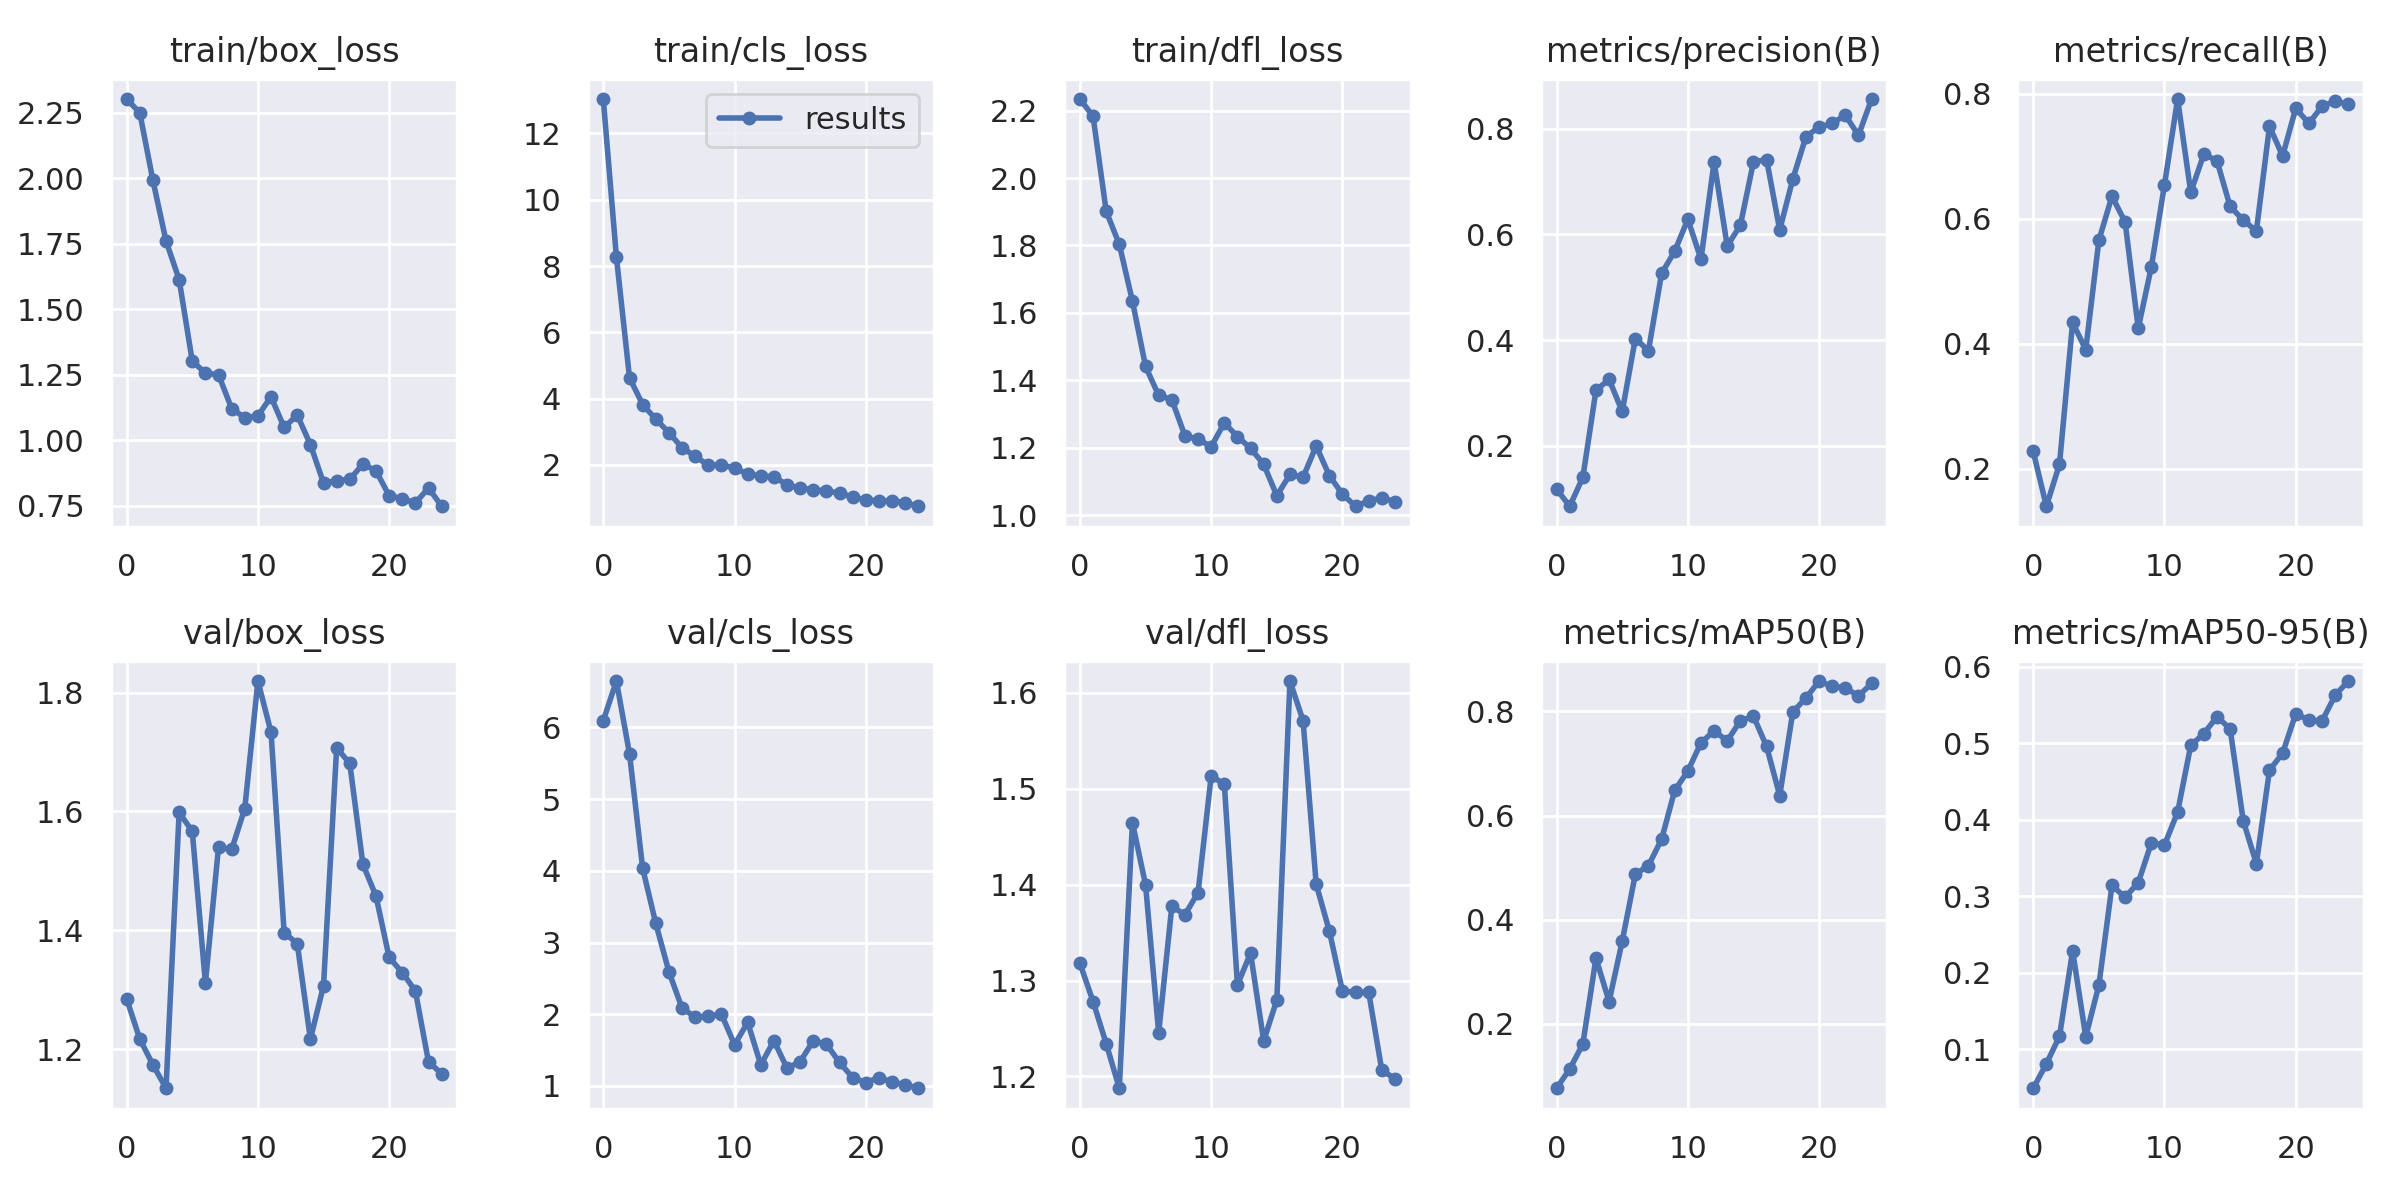

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/results.png', width=600)

/content


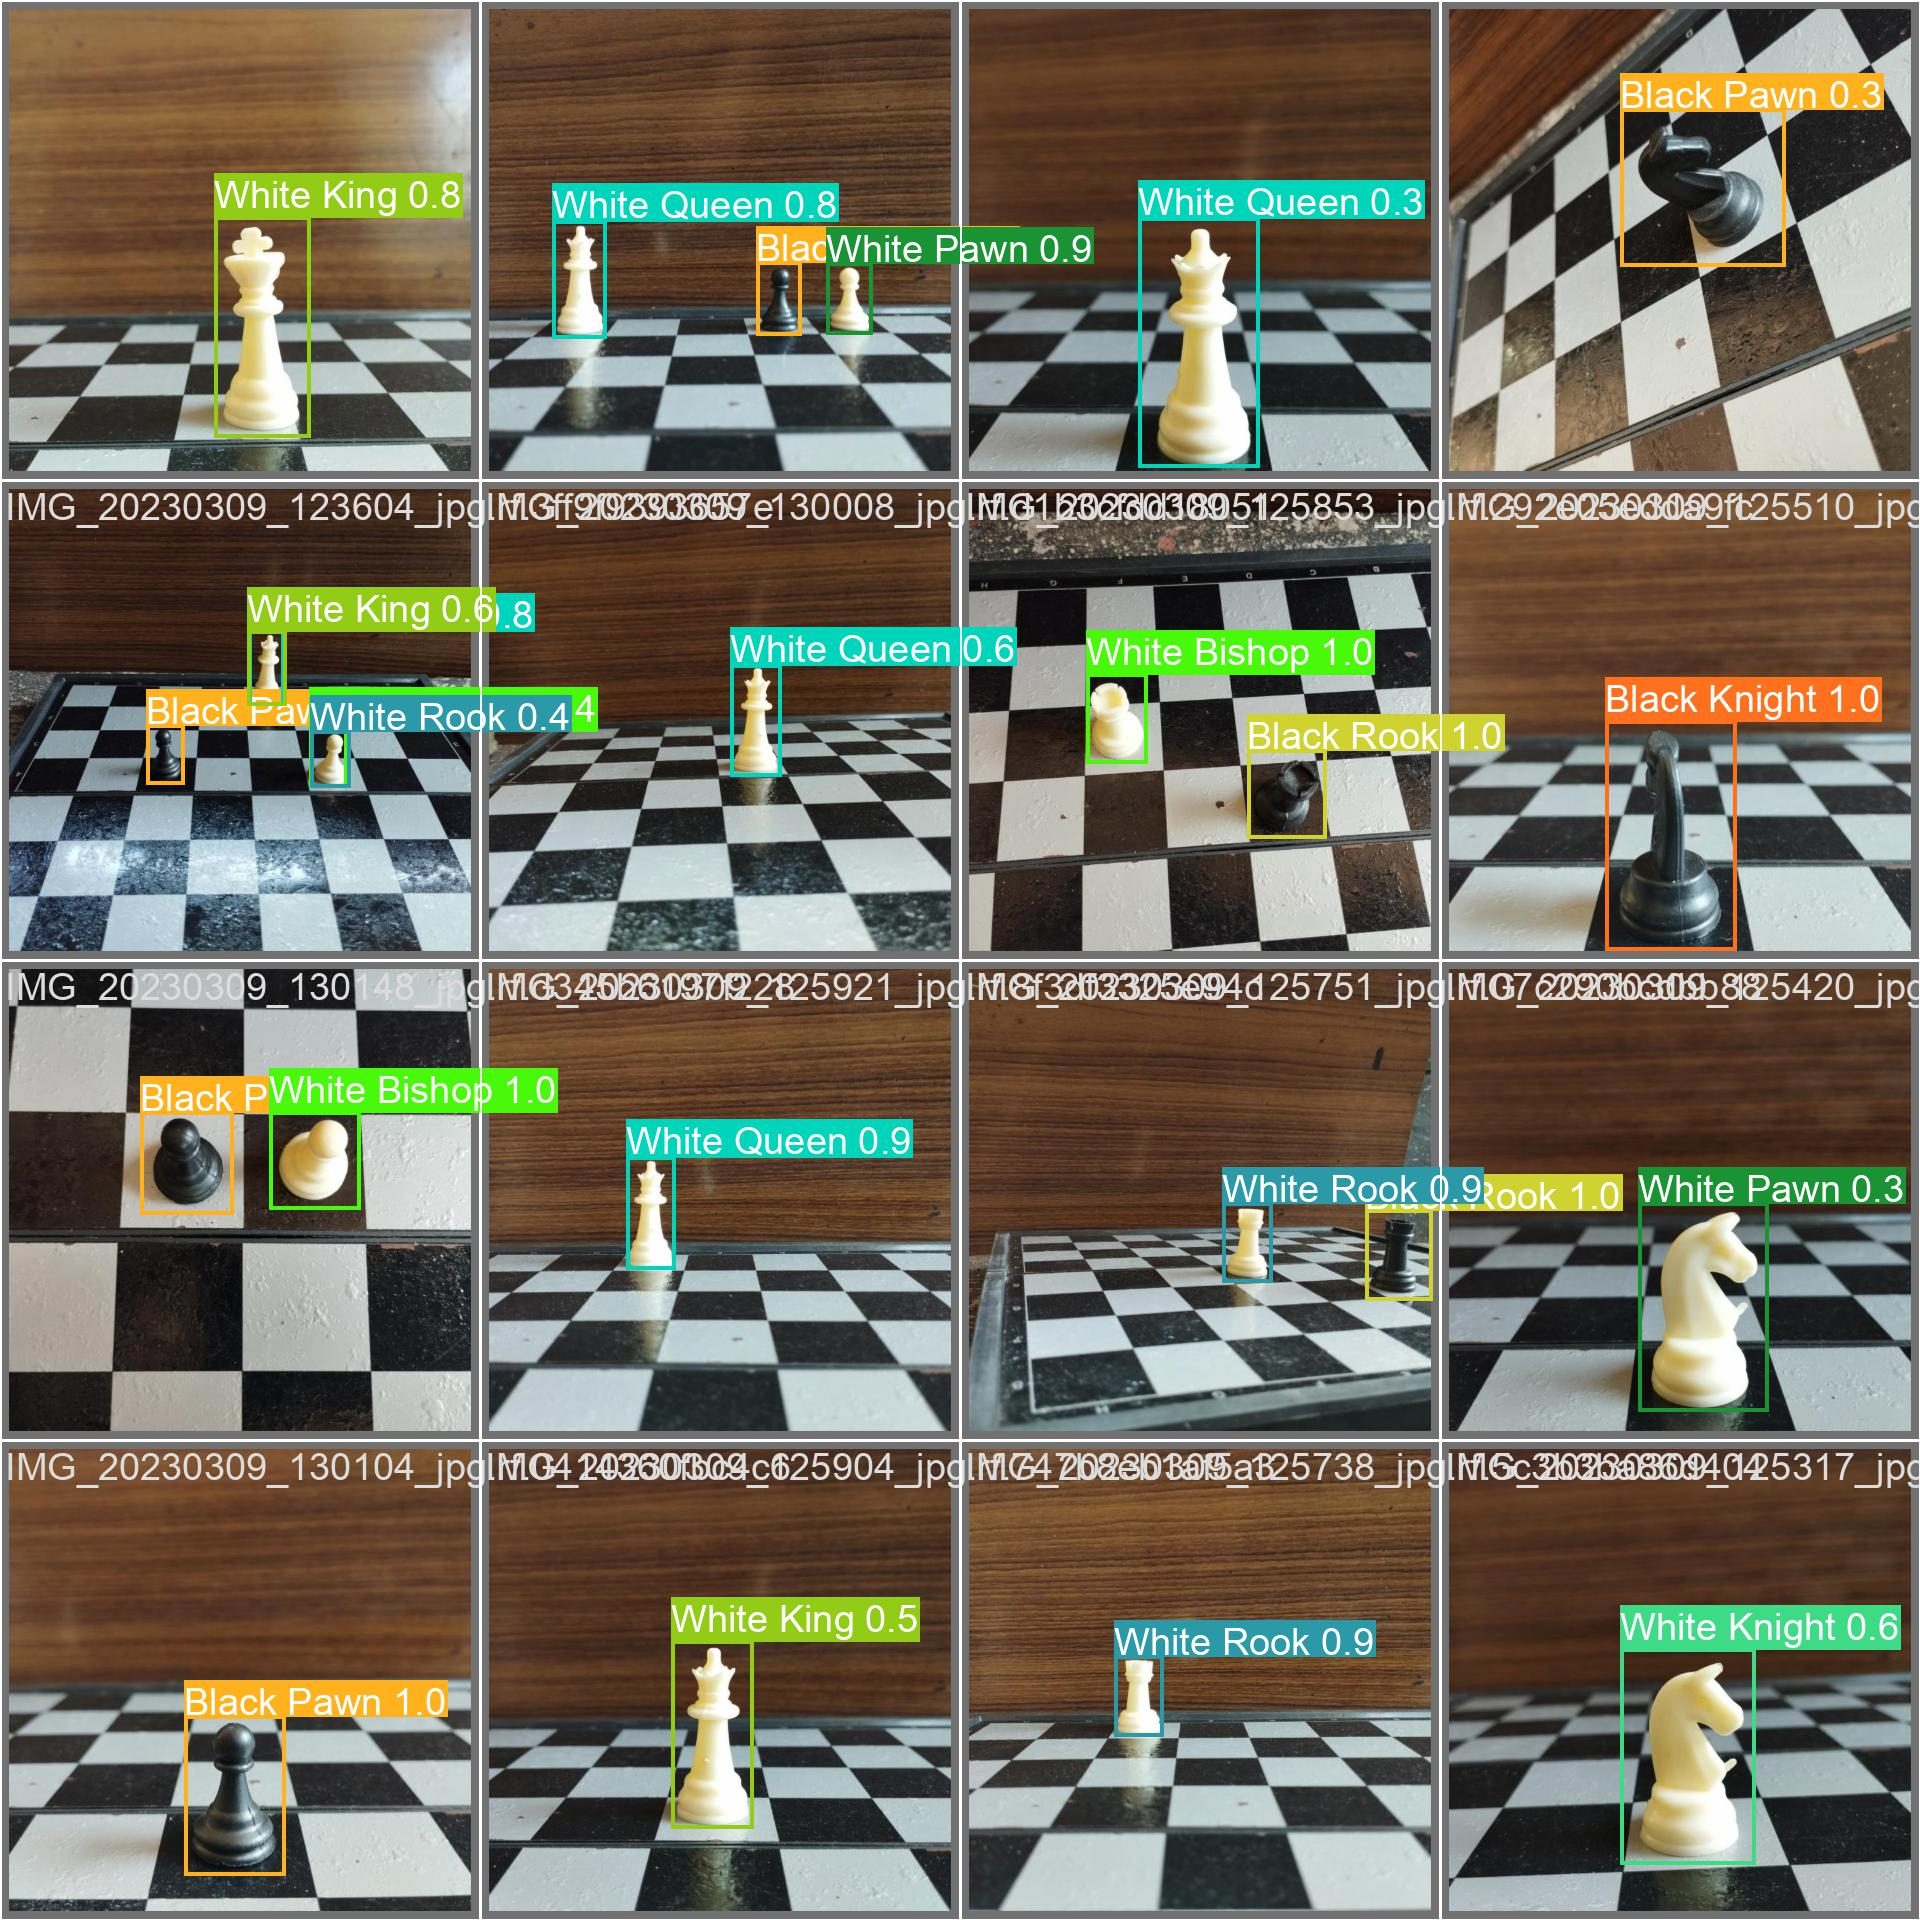

In [ ]:
%cd {HOME}
Image(filename=f'{HOME}/runs/detect/train/val_batch0_pred.jpg', width=600)

## Validate Custom Model

In [ ]:
%cd {HOME}

!yolo task=detect mode=val model={HOME}/runs/detect/train/weights/best.pt data={dataset.location}/data.yaml

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
val: Scanning /content/datasets/Chess-Pieces-Detection-1/valid/labels.cache... 30 images, 0 backgrounds, 0 corrupt: 100% 30/30 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% 2/2 [00:01<00:00,  1.25it/s]
                   all         30         53      0.856      0.784      0.854      0.581
          Black Bishop         30          4          1      0.686      0.995       0.73
            Black King         30          7          1      0.869      0.995      0.665
          Black Knight         30          3          1      0.815      0.995        0.6
            Black Pawn         30          7      0.932          1      0.995      0.631
            Black Rook         30          3      0.874          1      0.995      0.605
          White Bisho

## Inference with Custom Model

In [ ]:
%cd {HOME}
!yolo task=detect mode=predict model={HOME}/runs/detect/train/weights/best.pt conf=0.25 source={dataset.location}/test/images save=True

/content
Ultralytics YOLOv8.0.20 🚀 Python-3.9.16 torch-1.13.1+cu116 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 168 layers, 11129841 parameters, 0 gradients, 28.5 GFLOPs
image 1/15 /content/datasets/Chess-Pieces-Detection-1/test/images/IMG_20230309_123916_jpg.rf.987a7aebe800e29200113ef7d61c2624.jpg: 800x800 1 Black King, 26.1ms
image 2/15 /content/datasets/Chess-Pieces-Detection-1/test/images/IMG_20230309_124029_jpg.rf.75d267227a21f8f64bcd2b6e33896e69.jpg: 800x800 1 Black King, 26.1ms
image 3/15 /content/datasets/Chess-Pieces-Detection-1/test/images/IMG_20230309_124124_jpg.rf.c3823476148daf9709ebed79243113b3.jpg: 800x800 1 Black King, 1 White King, 26.1ms
image 4/15 /content/datasets/Chess-Pieces-Detection-1/test/images/IMG_20230309_124402_jpg.rf.4ec6a26b09a5faa3d3d54b8657dfba63.jpg: 800x800 1 Black Bishop, 25.5ms
image 5/15 /content/datasets/Chess-Pieces-Detection-1/test/images/IMG_20230309_124426_jpg.rf.960db70ebb413c8feb81e1b47db55a76.jpg: 800x800 1 Black Bishop, 21.5ms
image

**NOTE:** Let's take a look at few results.

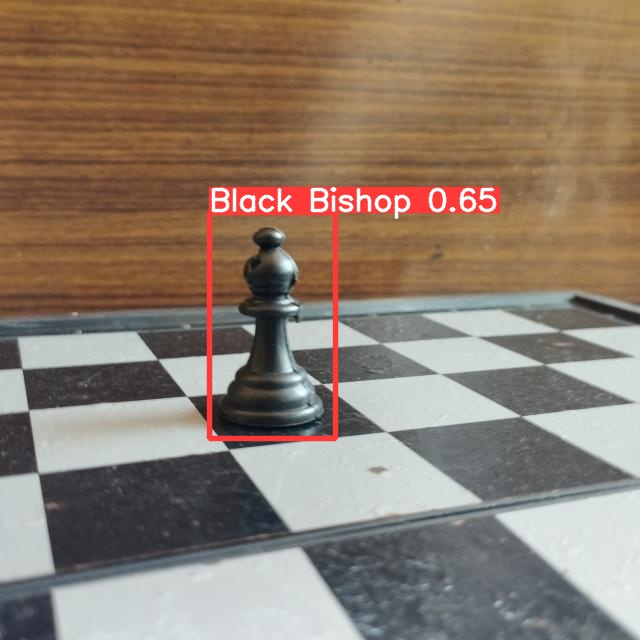

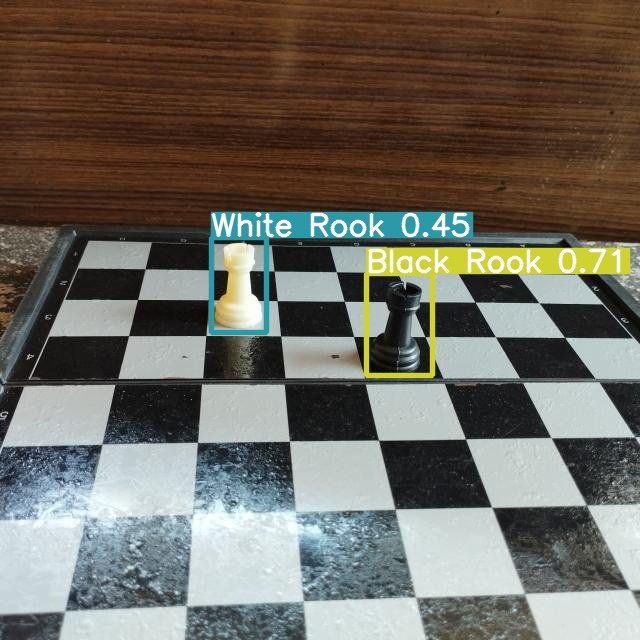

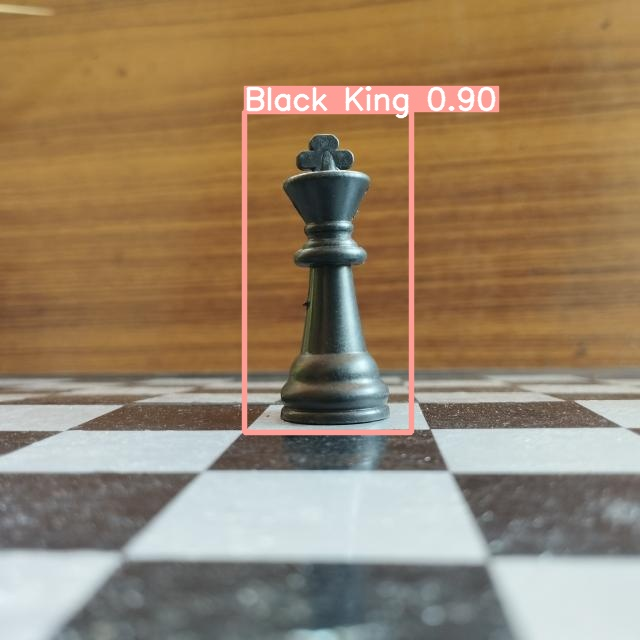

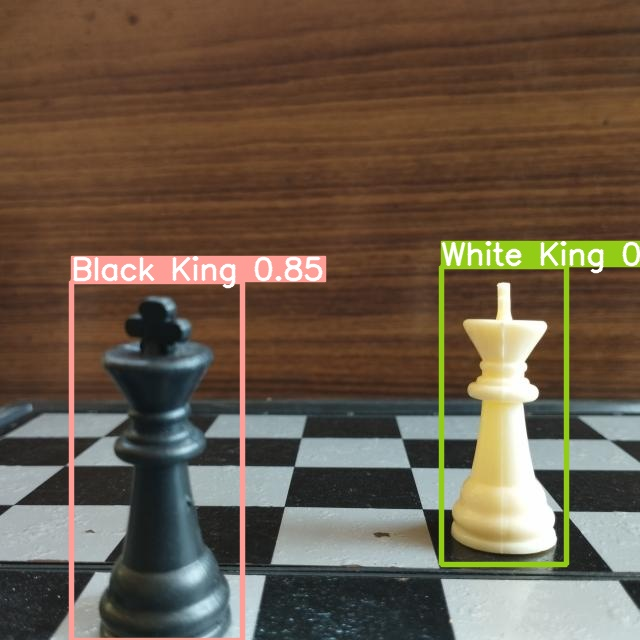

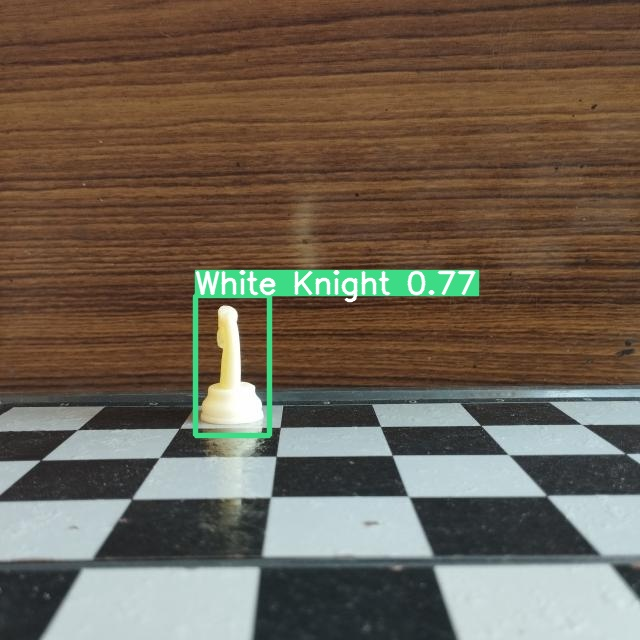

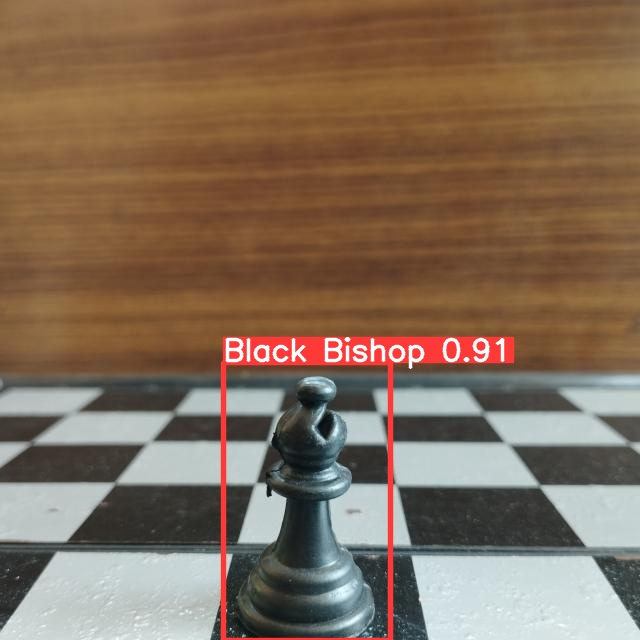

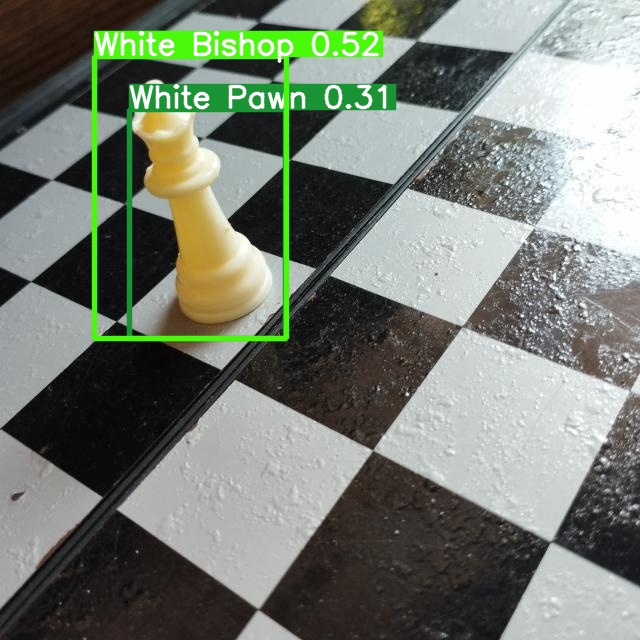

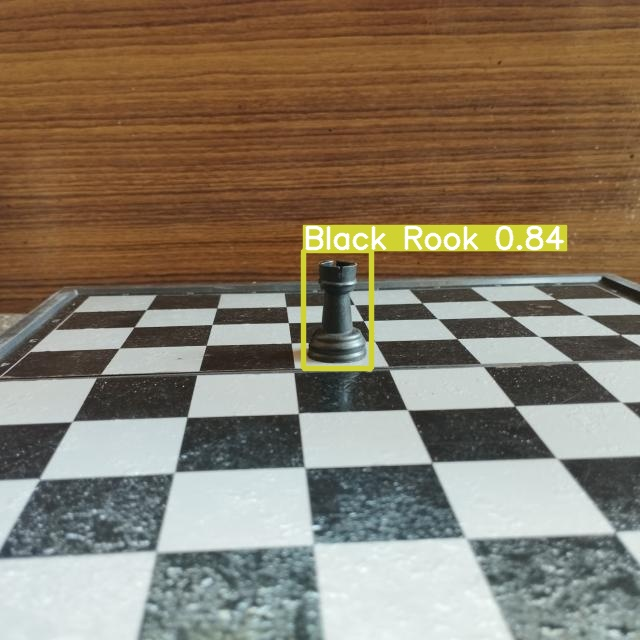

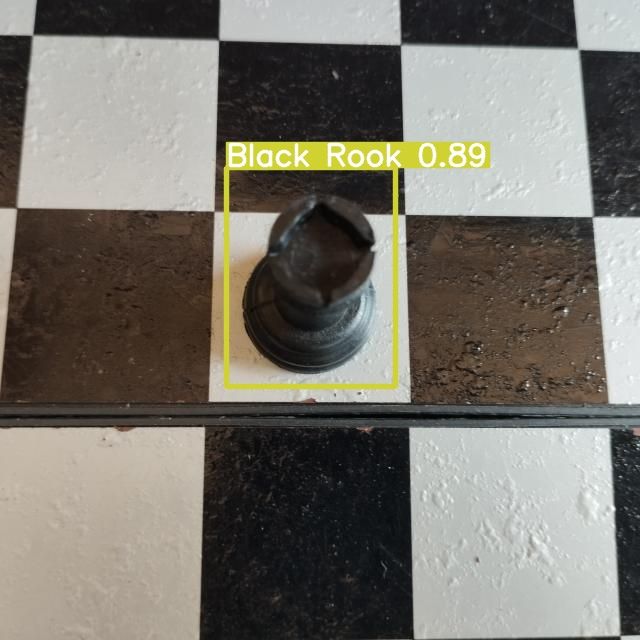

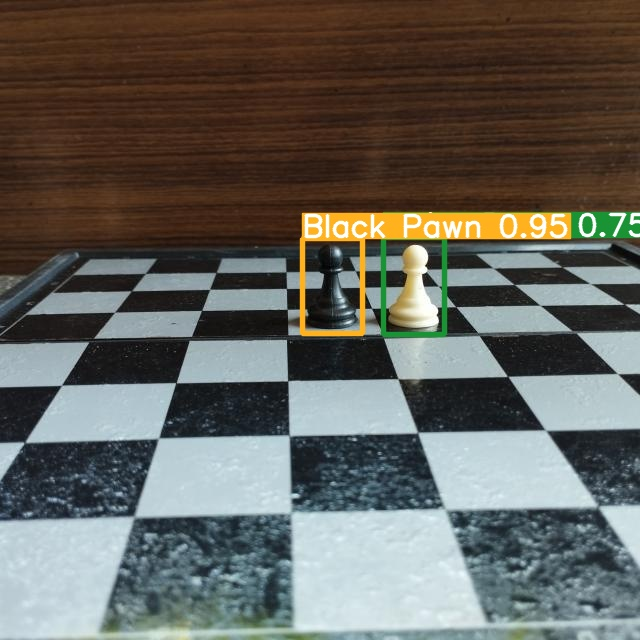

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'{HOME}/runs/detect/predict/*.jpg')[:10]:
      display(Image(filename=image_path, width=600))
      print("\n")